In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd 

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
coltri = ["darkred", "skyblue", "orange"]

In [114]:
N=100*10e6

#max hospital ccpacity
c = 50e-4
#fraction hospital care needed
q = 0.2

R0 = 2.4
kav = 4.

In [115]:
from scipy.integrate import odeint

t = np.arange(1,100,1)
A0 = 10000
S0 = N - A0
y0 = S0, A0, 0


# muA = 1./5
# muI = 1./5 
# mu = (1./muA + 1./muI)**(-1)
# beta = kav*R0*mu
# p = 3./4
# betaA = p*beta
# betaI = (1-p)*beta
# def SAIR(y, t, N, muA, muI, betaA, betaI):
#     S, A, I = y
#     dSdt = -(betaA+betaI) * S * (A + I) / N 
#     dAdt = betaA * S * (A + I) / N - muA * A 
#     dIdt = betaI * S * (A + I) / N - muI * I 
# #     dRdt = muA * A + muI * I
#     return dSdt, dAdt, dIdt
# ret = odeint(SAIR, y0, t, args=(N, muA, muI, betaA, betaI))
# S, A, I = ret.T
# R = N - S - A - I

muAI = 1./5
muAR = 1./13
muIR = 1./13 
mu = (1./muAI + 1./muIR)**(-1)
beta = kav*R0*mu
def SAIR(y, t, N, muAI, muAR, muIR, beta):
    S, A, I = y
    dSdt = -beta*S/N*A 
    dAdt = beta*S/N*A - muAI*A - muAR*A 
    dIdt = muAI*A - muIR*I 
#     dRdt = muA * A + muI * I
    return dSdt, dAdt, dIdt
ret = odeint(SAIR, y0, t, args=(N, muAI, muAR, muIR, beta))
S, A, I = ret.T
R = N - S - A - I

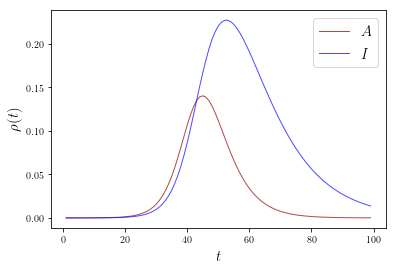

In [116]:
ls = 1
# fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=False, sharey=True, figsize=(12,3))
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(t[::ls], (A/N)[::ls], '-', alpha=0.7, lw=1, color=coltri[0], label='$A$',mfc='none')
ax1.plot(t[::ls], (I/N)[::ls], '-', alpha=0.7, lw=1, color='blue', label='$I$',mfc='none')
# ax1.plot(t[::ls], np.exp((beta - muAI - muAR)*t)[::ls], '-s', alpha=0.7, lw=1, color='blue', label='$I$',mfc='none')

# ax1.plot(t[::ls], (A/(p*N))[::ls], '-o', alpha=0.7, lw=1, color=coltri[0], label='$A$',mfc='none')
# ax1.plot(t[::ls], (S/N)[::ls], '-', alpha=0.7, lw=1, color=coltri[1], label='$S$',mfc='none')
# ax1.plot(t[::ls], (R/N)[::ls], '-', alpha=0.7, lw=1, color=coltri[2], label='$R$',mfc='none')
# ax1.plot(t[::ls], (I/((1-p)*N))[::ls], '-s', alpha=0.7, lw=1, color='blue', label='$I$',mfc='none')
plt.legend(loc='best',prop={'size':15},frameon=True)

ax1.set_ylabel(r'$\rho(t)$',fontsize=15)
ax1.set_xlabel(r'$t$',fontsize=15)
# plt.xlim(0,40)
# plt.yscale('log')
# plt.xscale('log')
# ax2.set_xlabel(r'$t$')
# ax3.set_xlabel(r'$t$')
plt.show()

In [101]:
mu,muAI,muAR,beta

(0.05555555555555555, 0.2, 0.07692307692307693, 0.13333333333333333)

In [97]:
x = kav*(R0*mu) - (muAI + muAR)
x

0.2564102564102564

In [64]:
kav  = (muAI + muAR + 0.2)/(R0*mu)
kav

3.576923076923077

In [30]:
np.log(2)

0.6931471805599453

In [118]:
for k in np.arange(1,10,0.5):
    print(k*(R0*mu) - (muAI + muAR))

-0.1435897435897436
-0.07692307692307693
-0.010256410256410275
0.056410256410256376
0.12307692307692308
0.18974358974358974
0.2564102564102564
0.32307692307692304
0.3897435897435897
0.45641025641025634
0.5230769230769231
0.5897435897435898
0.6564102564102564
0.7230769230769231
0.7897435897435897
0.8564102564102564
0.923076923076923
0.9897435897435897


In [119]:
from mpmath import gamma
print(float(gamma(0.5)))

1.772453850905516


In [99]:
eta = 0.2
# gamma = betaA/eta
# beta, 1./mu, 1./muA, gamma 

def SAIR_t(y, t, N, eta, muA, muI, betaA, betaI):
    S, A, I = y
    dSdt = -(betaA+betaI)/(1+eta*t) * S * (A + I) / N 
    dAdt = betaA/(1+eta*t) * S * (A + I) / N - muA * A 
    dIdt = betaI/(1+eta*t) * S * (A + I) / N - muI * I 
    return dSdt, dAdt, dIdt

t = np.arange(1,100,1)
A0 = 100
S0 = N - A0
y0 = S0, A0, 0
ret = odeint(SAIR_t, y0, t, args=(N, eta, muA, muI, betaA, betaI))
S_t, A_t, I_t = ret.T
R_t = N - S_t - A_t - I_t
I_t/N

array([0.00000000e+00, 1.09681191e-07, 5.12278883e-07, 1.76642077e-06,
       5.14909392e-06, 1.32497863e-05, 3.08291907e-05, 6.59505881e-05,
       1.31345501e-04, 2.45916269e-04, 4.36207196e-04, 7.37591768e-04,
       1.19482593e-03, 1.86151375e-03, 2.79794570e-03, 4.06675607e-03,
       5.72598817e-03, 7.81956371e-03, 1.03658943e-02, 1.33463914e-02,
       1.66966384e-02, 2.03034561e-02, 2.40104514e-02, 2.76326715e-02,
       3.09781986e-02, 3.38720821e-02, 3.61771095e-02, 3.78070425e-02,
       3.87304748e-02, 3.89661852e-02, 3.85726947e-02, 3.76352842e-02,
       3.62532451e-02, 3.45291475e-02, 3.25609042e-02, 3.04366546e-02,
       2.82320598e-02, 2.60094235e-02, 2.38180628e-02, 2.16954341e-02,
       1.96686457e-02, 1.77560948e-02, 1.59690659e-02, 1.43131949e-02,
       1.27897521e-02, 1.13967321e-02, 1.01297555e-02, 8.98279873e-03,
       7.94877299e-03, 7.01997538e-03, 6.18843298e-03, 5.44616000e-03,
       4.78534458e-03, 4.19848015e-03, 3.67845311e-03, 3.21859709e-03,
      

In [101]:
np.arange(0.2,0.25,0.01)

array([0.2 , 0.21, 0.22, 0.23, 0.24])

In [103]:
inflist = []
etarange = np.arange(0.2,0.25,0.01)
for eta in etarange:
    ret = odeint(SAIR_t, y0, t, args=(N, eta, muA, muI, betaA, betaI))
    S_t, A_t, I_t = ret.T
    inflist.append(I_t/N)
    
infarray = np.asarray(inflist) 
labe = ['$\eta=0.2$','$\eta=0.21$', '$\eta=0.22$', '$\eta=0.23$', '$\eta=0.24$']

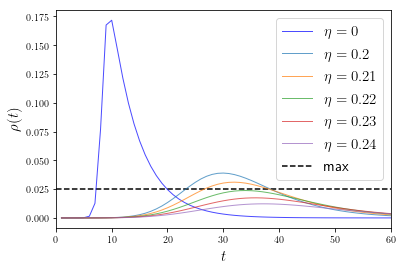

In [106]:
ls = 1


# fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=False, sharey=True, figsize=(12,3))
fig = plt.figure()
ax1 = fig.add_subplot(111)
# ax1.plot(t[::ls], (A/N)[::ls], '-o', alpha=0.7, lw=1, color=coltri[0], label='$A$',mfc='none')
# ax1.plot(t[::ls], (S/N)[::ls], '-', alpha=0.7, lw=1, color=coltri[1], label='$S$',mfc='none')
# ax1.plot(t[::ls], (R/N)[::ls], '-', alpha=0.7, lw=1, color=coltri[2], label='$R$',mfc='none')
ax1.plot(t[::ls], (I/N)[::ls], '-', alpha=0.7, lw=1, color='blue', label='$\eta=0$',mfc='none')
# ax1.plot(t[::ls], (I_t/N)[::ls], '-s', alpha=0.7, lw=1, color=coltri[1], label='',mfc='none')
for ii in range(len(etarange)):
    ax1.plot(t[::ls], infarray[ii][::ls], '-', alpha=0.7, lw=1, label=labe[ii],mfc='none')
    


plt.hlines(c/q, 0, 60, colors='k', linestyles='--', label='max')

plt.legend(loc='best',prop={'size':15},frameon=True)

ax1.set_ylabel(r'$\rho(t)$',fontsize=15)
ax1.set_xlabel(r'$t$',fontsize=15)
plt.xlim(0,60)
# plt.yscale('log')
# plt.xscale('log')
# ax2.set_xlabel(r'$t$')
# ax3.set_xlabel(r'$t$')
plt.show()

In [198]:
def asym_curve(t, A0, eta, muA, beta):
    return A0*(1+eta*t)**(beta/eta) * np.exp(-muA*t)

In [301]:
1./5/(1./5+1./13)

0.7222222222222222

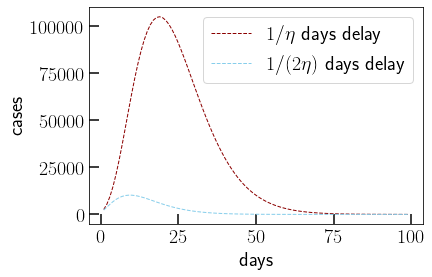

In [283]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
# plt.plot(np.arange(1,len(ydata_IT)+1,1)-7,ydata_IT, 'o-', color=coltri[2],  label=r'IT (-39)')
# plt.plot(xdata[:],ydata_UK[:], 'o-', color=coltri[0],  label=r'UK')
plt.plot(xdata, asym_curve(xdata,A0, eta, muA, beta), '--',color=coltri[0], lw=1, label=r'$1/\eta$ days delay')
plt.plot(xdata, asym_curve(xdata,A0, 2*eta, muA, beta), '--',color=coltri[1], lw=1, label=r'$1/(2\eta)$ days delay')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days", fontsize=20)
plt.ylabel(r"cases", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
# plt.ylim(10,10000)
# plt.yscale('log')
# plt.xscale('log')
plt.title('',fontsize = 25)
plt.show()

In [3]:
def fitExp(t, a, b, c):
    return a*np.exp(b*t) + c

def fitPowerlaw(t, a, b, c):
    return a*t**(b) + c

def fitAlgebraic(t, a, b, c):
    return a*t + b*t**(2) 

In [5]:
data = pd.read_csv('COVID-19-geographic-disbtribution-worldwide-2020-03-14.csv',sep=';') 

In [6]:
data.head()

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
0,11/03/2020,Afghanistan,3,0,AF,NaN,Non-EU/EEA
1,08/03/2020,Afghanistan,3,0,AF,NaN,Non-EU/EEA
2,02/03/2020,Afghanistan,0,0,AF,NaN,Non-EU/EEA
3,01/03/2020,Afghanistan,0,0,AF,NaN,Non-EU/EEA
4,29/02/2020,Afghanistan,0,0,AF,NaN,Non-EU/EEA


In [7]:
data[['CountryExp','NewConfCases']]

,CountryExp,NewConfCases
0,Afghanistan,3
1,Afghanistan,3
2,Afghanistan,0
3,Afghanistan,0
4,Afghanistan,0
...,...,...
4996,Vietnam,0
4997,Vietnam,0
4998,Vietnam,0
4999,Vietnam,0


In [8]:
england = data[data.CountryExp =='United Kingdom']
england

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
4780,14/03/2020,United Kingdom,117,0,UK,NaN,Former EU
4781,13/03/2020,United Kingdom,134,4,UK,NaN,Former EU
4783,11/03/2020,United Kingdom,52,1,UK,NaN,Former EU
4784,10/03/2020,United Kingdom,48,2,UK,NaN,Former EU
4785,09/03/2020,United Kingdom,67,1,UK,NaN,Former EU
...,...,...,...,...,...,...,...
4850,04/01/2020,United Kingdom,0,0,UK,NaN,Former EU
4851,03/01/2020,United Kingdom,0,0,UK,NaN,Former EU
4852,02/01/2020,United Kingdom,0,0,UK,NaN,Former EU
4853,01/01/2020,United Kingdom,0,0,UK,NaN,Former EU


In [9]:
newcases_UK = np.flip(england.NewConfCases.to_numpy()[:21])

In [10]:
ydata_UK = np.cumsum(newcases_UK)
t = np.arange(1,len(ydata_UK)+1,1)
xdata = t
xdata,ydata_UK

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21]),
 array([  0,   0,   4,   4,   4,   4,   7,   9,  14,  27,  31,  42,  76,
        106, 154, 197, 264, 312, 364, 498, 615]))

In [13]:
# Initial guess.
A0,B0,C0 = 1,1,1
x0 = np.array([A0, B0, C0])

# func = fitAlgebraic
# func = fitPowerlaw
func = fitExp

popt_UK, pcov_UK = curve_fit(func, xdata[5:], ydata_UK[5:]+1, x0,maxfev = 5000)

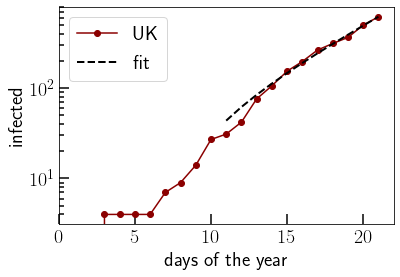

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
# plt.plot(np.arange(1,len(ydata_IT)+1,1)-7,ydata_IT, 'o-', color=coltri[2],  label=r'IT (-39)')
plt.plot(xdata[:],ydata_UK[:], 'o-', color=coltri[0],  label=r'UK')
plt.plot(xdata[10:], func(xdata, *popt_UK)[10:], '--',color='black', lw=2, label=r'fit')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days of the year", fontsize=20)
plt.ylabel(r"infected", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
# plt.ylim(10,10000)
plt.yscale('log')
# plt.xscale('log')
plt.title('',fontsize = 25)
plt.show()

In [16]:
func(np.arange(1,30), *popt_UK)

array([-2.32109803e+01, -2.10925639e+01, -1.84665855e+01, -1.52114359e+01,
       -1.11763688e+01, -6.17451980e+00,  2.57471863e-02,  7.71156708e+00,
        1.72388709e+01,  2.90488691e+01,  4.36884836e+01,  6.18356765e+01,
        8.43308459e+01,  1.12215745e+02,  1.46781727e+02,  1.89629544e+02,
        2.42743484e+02,  3.08583258e+02,  3.90197913e+02,  4.91367029e+02,
        6.16775759e+02,  7.72231793e+02,  9.64934314e+02,  1.20380739e+03,
        1.49991327e+03,  1.86696462e+03,  2.32195965e+03,  2.88596920e+03,
        3.58511262e+03])

In [17]:
italy = data[data.CountryExp =='Italy']

In [18]:
italy

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
2447,14/03/2020,Italy,2547,252,IT,NaN,EU
2448,13/03/2020,Italy,2651,189,IT,NaN,EU
2449,12/03/2020,Italy,2313,196,IT,NaN,EU
2450,11/03/2020,Italy,977,167,IT,NaN,EU
2451,10/03/2020,Italy,1797,98,IT,NaN,EU
...,...,...,...,...,...,...,...
2517,04/01/2020,Italy,0,0,IT,NaN,EU
2518,03/01/2020,Italy,0,0,IT,NaN,EU
2519,02/01/2020,Italy,0,0,IT,NaN,EU
2520,01/01/2020,Italy,0,0,IT,NaN,EU


In [19]:
# cases_it[["DateRep", "NewConfCases"]].to_numpy()
newcases_IT = np.flip(italy.NewConfCases.to_numpy()[:21])

In [20]:
newcases_IT

array([  62,   53,   97,   93,   78,  250,  238,  240,  561,  146,  667,
        587,  769,  778, 1247, 1492, 1797,  977, 2313, 2651, 2547])

In [21]:
ydata_IT = np.cumsum(newcases_IT)
t = np.arange(1,len(ydata_IT)+1,1)
xdata = t
xdata,ydata_IT

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21]),
 array([   62,   115,   212,   305,   383,   633,   871,  1111,  1672,
         1818,  2485,  3072,  3841,  4619,  5866,  7358,  9155, 10132,
        12445, 15096, 17643]))

In [22]:
# Initial guess.
A0,B0,C0 = 1,1,1
x0 = np.array([A0, B0, C0])

# func = fitAlgebraic
# func = fitPowerlaw
func = fitExp

popt_IT, pcov_IT = curve_fit(func, xdata[:], ydata_IT[:]+1, x0,maxfev = 5000)
A_IT, B_IT, C_IT = popt_IT[0], popt_IT[1], popt_IT[2]
x_IT = np.array([A_IT, B_IT, C_IT])
curve_IT = func(t, A_IT, B_IT, C_IT)
x_IT,curve_IT

(array([ 4.94194735e+02,  1.72755669e-01, -7.23353819e+02]),
 array([ -135.9659842 ,   -25.1989333 ,   106.45608775,   262.9380418 ,
          448.92868421,   669.99263547,   932.7438681 ,  1245.04358884,
         1616.23543674,  2057.42503377,  2581.81225193,  3205.08613786,
         3945.89431058,  4826.40087624,  5872.94955203,  7116.8518391 ,
         8595.32382569, 10352.59964861, 12441.25492638, 14923.77975968,
        17874.44836139]))

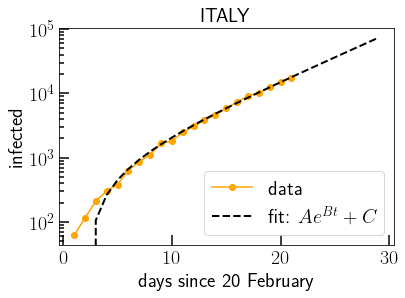

In [23]:
coltri = ["darkred", "skyblue", "orange"]



fig = plt.figure()
ax = fig.add_subplot(111)
# plt.hlines(60e+6, 0, 70, colors='k', linestyles='--', label='max') 
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
plt.plot(xdata,ydata_IT, 'o-', color=coltri[2],  label=r'data')
plt.plot(np.arange(1,30), func(np.arange(1,30), *popt_IT), '--',color='black', lw=2, label=r'fit: $Ae^{Bt}+C$')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days since 20 February", fontsize=20)
plt.ylabel(r"infected", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
plt.yscale('log')
# plt.xscale('log')
plt.title('ITALY',fontsize = 20)
plt.show()
# fig.savefig("fig_diamter_SISnoinset.pdf", bbox_inches='tight')
# plt.close("all")


In [24]:
newdeaths_IT = np.flip(italy.NewDeaths.to_numpy()[:21])
ydata_deaths_IT = np.cumsum(newdeaths_IT)
popt_deaths_IT = curve_fit(func, xdata, ydata_deaths_IT, x0,maxfev = 5000)[0]

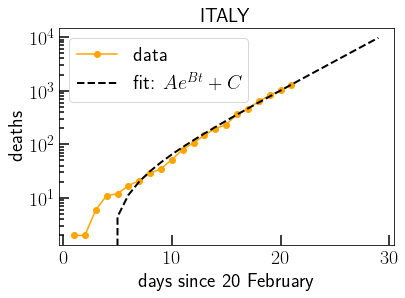

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
# plt.hlines(5e+3, 0, 70, colors='k', linestyles='--', label='max') 
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
plt.plot(xdata,ydata_deaths_IT, 'o-', color=coltri[2],  label=r'data')
plt.plot(np.arange(1,30), func(np.arange(1,30), *popt_deaths_IT), '--',color='black', lw=2, label=r'fit: $Ae^{Bt}+C$')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days since 20 February", fontsize=20)
plt.ylabel(r"deaths", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
plt.yscale('log')
# plt.xscale('log')
plt.title('ITALY',fontsize = 20)
plt.show()
# fig.savefig("fig_diamter_SISnoinset.pdf", bbox_inches='tight')
# plt.close("all")

In [26]:
popt_deaths_IT

array([  6.95815336,   0.24977701, -19.79758495])

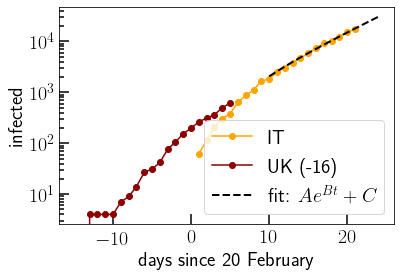

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
plt.plot(xdata,ydata_IT, 'o-', color=coltri[2],  label=r'IT')
# plt.plot(xdata-9,ydata_DE, 'o-', color=coltri[1],  label=r'DE (+9)')
plt.plot(xdata-16,ydata_UK, 'o-', color=coltri[0],  label=r'UK (-16)')


plt.plot(np.arange(10,25), func(np.arange(10,25), *popt_IT), '--',color='black', lw=2, label=r'fit: $Ae^{Bt}+C$')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days since 20 February", fontsize=20)
plt.ylabel(r"infected", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
# plt.ylim(-100,2600)
plt.yscale('log')
# plt.xscale('log')
plt.title('',fontsize = 25)
plt.show()

In [30]:
newdeaths_UK = np.flip(england.NewDeaths.to_numpy()[:21])
ydata_deaths_UK = np.cumsum(newdeaths_UK)
popt_deaths_UK = curve_fit(func, xdata, ydata_deaths_UK, x0,maxfev = 5000)[0]

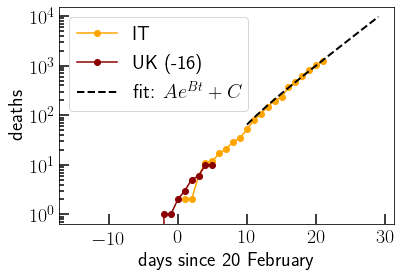

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
# plt.hlines(5e+3, 0, 70, colors='k', linestyles='--', label='max') 
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
plt.plot(xdata,ydata_deaths_IT, 'o-', color=coltri[2],  label=r'IT')
plt.plot(xdata-16,ydata_deaths_UK, 'o-', color=coltri[0],  label=r'UK (-16)')
plt.plot(np.arange(10,30), func(np.arange(10,30), *popt_deaths_IT), '--',color='black', lw=2, label=r'fit: $Ae^{Bt}+C$')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days since 20 February", fontsize=20)
plt.ylabel(r"deaths", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
plt.yscale('log')
# plt.xscale('log')
# plt.title('ITALY',fontsize = 20)
plt.show()
# fig.savefig("fig_diamter_SISnoinset.pdf", bbox_inches='tight')
# plt.close("all")

In [34]:
popt_deaths_IT

array([  6.95815336,   0.24977701, -19.79758495])

In [24]:
germany = data[data.CountryExp =='Germany']
germany

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
1742,13/03/2020,Germany,802,2,DE,NaN,EU
1743,12/03/2020,Germany,271,1,DE,NaN,EU
1744,11/03/2020,Germany,157,0,DE,NaN,EU
1745,10/03/2020,Germany,237,2,DE,NaN,EU
1746,09/03/2020,Germany,55,0,DE,NaN,EU
...,...,...,...,...,...,...,...
1811,04/01/2020,Germany,0,0,DE,NaN,EU
1812,03/01/2020,Germany,0,0,DE,NaN,EU
1813,02/01/2020,Germany,0,0,DE,NaN,EU
1814,01/01/2020,Germany,0,0,DE,NaN,EU


In [25]:
newcases_DE = np.flip(germany.NewConfCases.to_numpy()[:21])
newcases_DE

array([  0,   0,   0,   0,   2,   4,  26,  10,  54,  18,  28,  39,  66,
       138, 284, 163,  55, 237, 157, 271, 802])

In [26]:
ydata_DE = np.cumsum(newcases_DE)
t = np.arange(1,len(ydata_DE)+1,1)
xdata = t
xdata,ydata_DE

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21]),
 array([   0,    0,    0,    0,    2,    6,   32,   42,   96,  114,  142,
         181,  247,  385,  669,  832,  887, 1124, 1281, 1552, 2354]))

In [27]:
# Initial guess.
A0,B0,C0 = 1,1,1
x0 = np.array([A0, B0, C0])

func = fitExp
popt_DE, pcov_DE = curve_fit(func, xdata, ydata_DE, x0,maxfev = 5000)
A_DE, B_DE, C_DE = popt_DE[0], popt_DE[1], popt_DE[2]
x_DE = np.array([A_DE, B_DE, C_DE])
curve_DE = fitExp(t, A_DE, B_DE, C_DE)
x_DE,curve_DE

(array([ 19.36277632,   0.22673493, -53.20863493]),
 array([ -28.91808434,  -22.73620484,  -14.98105369,   -5.25223753,
           6.95253606,   22.26339157,   41.47081844,   65.56648357,
          95.79443038,  133.715308  ,  181.28694654,  240.96543859,
         315.83194565,  409.75177652,  527.57395065,  675.38154982,
         860.8057837 , 1093.41998423, 1385.23387043, 1751.3136024 ,
        2210.55963726]))

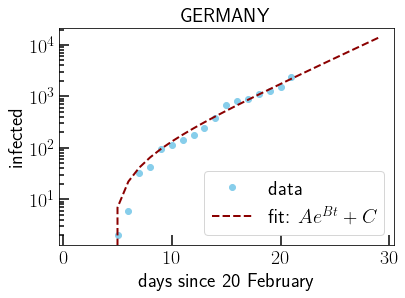

In [28]:

fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
plt.plot(xdata,ydata_DE, 'o', color=coltri[1],  label=r'data')
plt.plot(np.arange(1,30), func(np.arange(1,30), *popt_DE), '--',color=coltri[0], lw=2, label=r'fit: $Ae^{Bt}+C$')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days since 20 February", fontsize=20)
plt.ylabel(r"infected", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
plt.yscale('log')
# plt.xscale('log')
plt.title('GERMANY',fontsize = 20)
plt.show()

In [24]:
func(np.arange(1,30), *popt_DE)


array([-2.89180843e+01, -2.27362048e+01, -1.49810537e+01, -5.25223753e+00,
        6.95253606e+00,  2.22633916e+01,  4.14708184e+01,  6.55664836e+01,
        9.57944304e+01,  1.33715308e+02,  1.81286947e+02,  2.40965439e+02,
        3.15831946e+02,  4.09751777e+02,  5.27573951e+02,  6.75381550e+02,
        8.60805784e+02,  1.09341998e+03,  1.38523387e+03,  1.75131360e+03,
        2.21055964e+03,  2.78668255e+03,  3.50942718e+03,  4.41610837e+03,
        5.55353748e+03,  6.98043922e+03,  8.77048360e+03,  1.10160894e+04,
        1.38331959e+04])

In [31]:
usa = data[data.CountryExp =='United States of America']
usa

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
4761,13/03/2020,United States of America,351,10,US,NaN,Non-EU/EEA
4762,12/03/2020,United States of America,287,2,US,NaN,Non-EU/EEA
4763,11/03/2020,United States of America,271,2,US,NaN,Non-EU/EEA
4764,10/03/2020,United States of America,200,5,US,NaN,Non-EU/EEA
4765,09/03/2020,United States of America,121,4,US,NaN,Non-EU/EEA
...,...,...,...,...,...,...,...
4830,04/01/2020,United States of America,0,0,US,NaN,Non-EU/EEA
4831,03/01/2020,United States of America,0,0,US,NaN,Non-EU/EEA
4832,02/01/2020,United States of America,0,0,US,NaN,Non-EU/EEA
4833,01/01/2020,United States of America,0,0,US,NaN,Non-EU/EEA


In [32]:
newcases_US = np.flip(usa.NewConfCases.to_numpy()[:21])
newcases_US

array([ 19,   0,   0,  18,   0,   6,   1,   6,   3,  20,  14,  22,  34,
        74, 105,  95, 121, 200, 271, 287, 351])

In [33]:
ydata_US = np.cumsum(newcases_US)
t = np.arange(1,len(ydata_US)+1,1)
xdata = t
xdata,ydata_US

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21]),
 array([  19,   19,   19,   37,   37,   43,   44,   50,   53,   73,   87,
         109,  143,  217,  322,  417,  538,  738, 1009, 1296, 1647]))

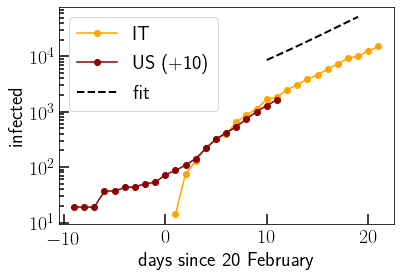

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
plt.plot(xdata,ydata_IT, 'o-', color=coltri[2],  label=r'IT')
# plt.plot(xdata-9,ydata_DE, 'o-', color=coltri[1],  label=r'DE (+9)')
plt.plot(xdata-10,ydata_US, 'o-', color=coltri[0],  label=r'US (+10)')


plt.plot(np.arange(10,20), func(np.arange(10,20)+10, 1.10748188e+02,  2.11390555e-01, 1000), '--',color='black', lw=2, label=r'fit')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days since 20 February", fontsize=20)
plt.ylabel(r"infected", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
# plt.ylim(-100,2600)
plt.yscale('log')
# plt.xscale('log')
plt.title('',fontsize = 25)
plt.show()

In [35]:
switzerland = data[data.CountryExp =='Switzerland']
switzerland

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
4394,13/03/2020,Switzerland,212,0,CH,NaN,Non-EU/EEA
4395,12/03/2020,Switzerland,152,1,CH,NaN,Non-EU/EEA
4396,11/03/2020,Switzerland,116,1,CH,NaN,Non-EU/EEA
4397,10/03/2020,Switzerland,42,0,CH,NaN,Non-EU/EEA
4398,09/03/2020,Switzerland,68,1,CH,NaN,Non-EU/EEA
...,...,...,...,...,...,...,...
4463,04/01/2020,Switzerland,0,0,CH,NaN,Non-EU/EEA
4464,03/01/2020,Switzerland,0,0,CH,NaN,Non-EU/EEA
4465,02/01/2020,Switzerland,0,0,CH,NaN,Non-EU/EEA
4466,01/01/2020,Switzerland,0,0,CH,NaN,Non-EU/EEA


In [36]:
newcases_CH = np.flip(switzerland.NewConfCases.to_numpy()[:21])
newcases_CH

array([  0,   0,   0,   0,   1,   0,   7,   4,   6,   6,   6,   7,  20,
        30, 122,  55,  68,  42, 116, 152, 212])

In [37]:
ydata_CH = np.cumsum(newcases_CH)
t = np.arange(1,len(ydata_CH)+1,1)
xdata = t
xdata,ydata_CH

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21]),
 array([  0,   0,   0,   0,   1,   1,   8,  12,  18,  24,  30,  37,  57,
         87, 209, 264, 332, 374, 490, 642, 854]))

In [38]:
popt_IT

array([ 3.63951274e+02,  1.79342096e-01, -5.72145652e+02])

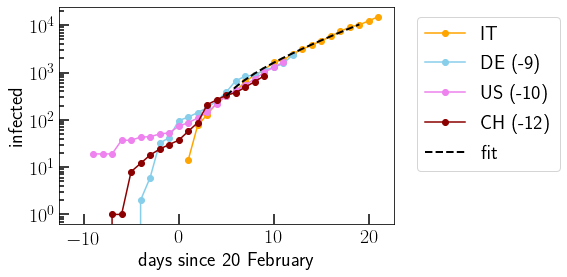

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
plt.plot(xdata,ydata_IT, 'o-', color=coltri[2],  label=r'IT')
plt.plot(xdata-9,ydata_DE, 'o-', color=coltri[1],  label=r'DE (-9)')
plt.plot(xdata-10,ydata_US, 'o-', color='violet',  label=r'US (-10)')
plt.plot(xdata-12,ydata_CH, 'o-', color=coltri[0],  label=r'CH (-12)')


plt.plot(np.arange(5,20), func(np.arange(5,20), *popt_IT), '--',color='black', lw=2, label=r'fit')
# plt.legend(loc='best',prop={'size':20},frameon=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={'size':20},frameon=True)
plt.xlabel(r"days since 20 February", fontsize=20)
plt.ylabel(r"infected", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
# plt.ylim(-100,2600)
plt.yscale('log')
# plt.xscale('log')
plt.title('',fontsize = 25)
plt.show()

In [30]:
popt_IT

array([ 2.86061083e+02,  1.82237032e-01, -5.09659404e+02])

In [43]:
japan = data[data.CountryExp =='Japan']
newcases_JP = np.flip(japan.NewConfCases.to_numpy()[:21])
newcases_JP

array([ 9, 12, 27, 12,  0, 20, 22, 24, 20,  9, 15,  0, 14, 49, 32, 59, 47,
       33, 26, 54, 51])

In [89]:
ydata_JP = np.cumsum(newcases_JP)
t = np.arange(1,len(ydata_JP)+1,1)
xdata = t
xdata,ydata_JP

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21]),
 array([  9,  21,  48,  60,  60,  80, 102, 126, 146, 155, 170, 170, 184,
        233, 265, 324, 371, 404, 430, 484, 535]))

In [6]:
china = data[data.CountryExp =='China']
china

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
946,13/03/2020,China,22,7,CN,NaN,Non-EU/EEA
947,12/03/2020,China,24,11,CN,NaN,Non-EU/EEA
948,11/03/2020,China,29,22,CN,NaN,Non-EU/EEA
949,10/03/2020,China,20,17,CN,NaN,Non-EU/EEA
950,09/03/2020,China,45,23,CN,NaN,Non-EU/EEA
...,...,...,...,...,...,...,...
1015,04/01/2020,China,0,0,CN,NaN,Non-EU/EEA
1016,03/01/2020,China,17,0,CN,NaN,Non-EU/EEA
1017,02/01/2020,China,0,0,CN,NaN,Non-EU/EEA
1018,01/01/2020,China,0,0,CN,NaN,Non-EU/EEA


In [7]:
newcases_CN = np.flip(china.NewConfCases.to_numpy())
newcases_CN

array([   27,     0,     0,    17,     0,    15,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     4,
          17,   136,    19,   151,   140,    97,   259,   441,   665,
         787,  1753,  1466,  1740,  1980,  2095,  2590,  2812,  3237,
        3872,  3727,  3160,  3418,  2607,  2974,  2490,  2028, 15141,
        4156,  2538,  2007,  2052,  1890,  1750,   394,   891,   826,
         647,   218,   515,   410,   439,   329,   428,   574,   205,
         127,   119,   117,   170,   101,    46,    45,    20,    29,
          24,    22])

In [8]:
ydata_CN = np.cumsum(newcases_CN)[20:50]
# ydata_CN = np.cumsum(newcases_CN)[20:]
xdata_CN = np.arange(1,len(ydata_CN)+1,1)
xdata_CN,ydata_CN

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 array([  235,   386,   526,   623,   882,  1323,  1988,  2775,  4528,
         5994,  7734,  9714, 11809, 14399, 17211, 20448, 24320, 28047,
        31207, 34625, 37232, 40206, 42696, 44724, 59865, 64021, 66559,
        68566, 70618, 72508]))

/usr/local/lib/python3.7/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


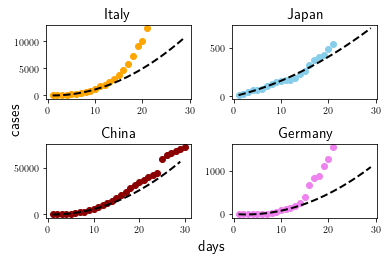

In [109]:
func = fitAlgebraic
# func = fitPowerlaw
# func = fitExp

popt_IT, pcov_IT = curve_fit(func, xdata[:10], ydata_IT[:10], x0,maxfev = 5000)
popt_DE, pcov_DE = curve_fit(func, xdata[:10], ydata_DE[:10], x0,maxfev = 5000)
popt_JP, pcov_JP = curve_fit(func, xdata[:10], ydata_JP[:10], x0,maxfev = 5000)
popt_CN, pcov_CN = curve_fit(func, xdata_CN[:10], ydata_CN[:10], x0,maxfev = 5000)

fig = plt.figure()
ax1 = fig.add_subplot(221)
plt.plot(xdata,ydata_IT, 'o', color=coltri[2],  label=r'IT')
plt.plot(np.arange(1,30), func(np.arange(1,30), *popt_IT), '--',color='black', lw=2, label=r'fit: $At + Bt^2$')
plt.title('Italy',fontsize = 15)
ax2 = fig.add_subplot(222)
plt.plot(xdata,ydata_JP, 'o', color=coltri[1],  label=r'JP')
plt.plot(np.arange(1,30), func(np.arange(1,30), *popt_JP), '--',color='black', lw=2, label=r'fit: $At + Bt^2$')
plt.title('Japan',fontsize = 15)
ax3 = fig.add_subplot(223)
plt.plot(xdata_CN,ydata_CN, 'o', color=coltri[0],  label=r'CN')
plt.plot(np.arange(1,30), func(np.arange(1,30), *popt_CN), '--',color='black', lw=2, label=r'fit: $At + Bt^2$')
plt.title('China',fontsize = 15)
ax4 = fig.add_subplot(224)
plt.plot(xdata,ydata_DE, 'o', color='violet',  label=r'DE')
plt.plot(np.arange(1,30), func(np.arange(1,30), *popt_DE), '--',color='black', lw=2, label=r'fit: $At + Bt^2$')
plt.title('Germany',fontsize = 15)

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel(r"days",fontsize = 15)
plt.ylabel(r"cases",fontsize = 15)
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
# plt.yscale('log')
# plt.xscale('log')
# plt.legend(loc='best',prop={'size':20},frameon=True)
# ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
# ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
fig.tight_layout(pad=1.0)
plt.show()
# fig.savefig("fig_diamter_SISnoinset.pdf", bbox_inches='tight')
# plt.close("all")

In [61]:
date_CN = np.flip(china.DateRep)[20:]

979    20/01/2020
978    21/01/2020
977    22/01/2020
976    23/01/2020
975    24/01/2020
974    25/01/2020
973    26/01/2020
972    27/01/2020
971    28/01/2020
970    29/01/2020
969    30/01/2020
968    31/01/2020
967    01/02/2020
966    02/02/2020
965    03/02/2020
964    04/02/2020
963    05/02/2020
962    06/02/2020
961    07/02/2020
960    08/02/2020
959    09/02/2020
958    10/02/2020
957    11/02/2020
956    12/02/2020
955    13/02/2020
954    14/02/2020
953    15/02/2020
952    16/02/2020
951    17/02/2020
950    18/02/2020
949    19/02/2020
948    20/02/2020
947    21/02/2020
946    22/02/2020
945    23/02/2020
944    24/02/2020
943    25/02/2020
942    26/02/2020
941    27/02/2020
940    28/02/2020
939    29/02/2020
938    01/03/2020
937    02/03/2020
936    03/03/2020
935    04/03/2020
934    05/03/2020
933    06/03/2020
932    07/03/2020
931    08/03/2020
930    09/03/2020
929    10/03/2020
928    11/03/2020
927    12/03/2020
Name: DateRep, dtype: object

In [72]:
# Initial guess.
A0,B0,C0 = 1,1,1
x0 = np.array([A0, B0, C0])

func = fitExp
# func = fitPowerlaw

popt_CN, pcov_CN = curve_fit(func, xdata[:20], ydata_CN[:20], x0,maxfev = 5000)
popt_CN, pcov_CN

(array([ 3.04960181e+03,  1.29702824e-01, -4.58457153e+03]),
 array([[ 2.88766620e+05, -4.38189512e+00, -4.90715393e+05],
        [-4.38189512e+00,  6.72092111e-05,  7.28637003e+00],
        [-4.90715393e+05,  7.28637003e+00,  9.09852306e+05]]))

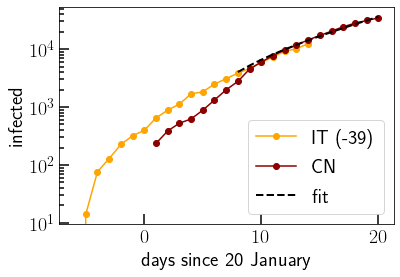

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
plt.plot(np.arange(1,len(ydata_IT)+1,1)-7,ydata_IT, 'o-', color=coltri[2],  label=r'IT (-39)')
plt.plot(xdata[:20],ydata_CN[:20], 'o-', color=coltri[0],  label=r'CN')
plt.plot(xdata[7:20], func(xdata, *popt_CN)[7:20], '--',color='black', lw=2, label=r'fit')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days since 20 January", fontsize=20)
plt.ylabel(r"infected", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
# plt.ylim(10,10000)
plt.yscale('log')
# plt.xscale('log')
plt.title('',fontsize = 25)
plt.show()

In [9]:
ydata_CN = np.cumsum(newcases_CN)[:]
# ydata_CN = np.cumsum(newcases_CN)[20:]
xdata_CN = np.arange(1,len(ydata_CN)+1,1)
xdata_CN,ydata_CN

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74]),
 array([   27,    27,    27,    44,    44,    59,    59,    59,    59,
           59,    59,    59,    59,    59,    59,    59,    59,    63,
           80,   216,   235,   386,   526,   623,   882,  1323,  1988,
         2775,  4528,  5994,  7734,  9714, 11809, 14399, 17211, 20448,
        24320, 28047, 31207, 34625, 37232, 40206, 42696, 44724, 59865,
        64021, 66559, 68566, 70618, 72508, 74258, 74652, 75543, 76369,
        77016, 77234, 77749, 78159, 78598, 78927, 79355, 79929, 80134,
        80261, 80380, 80497, 80667, 80768, 80814, 80859, 80879, 80908,
        80932, 80954]))

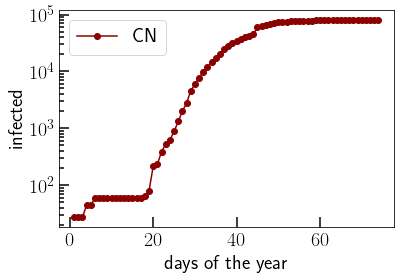

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
# plt.plot(np.arange(1,len(ydata_IT)+1,1)-7,ydata_IT, 'o-', color=coltri[2],  label=r'IT (-39)')
plt.plot(xdata_CN[:],ydata_CN[:], 'o-', color=coltri[0],  label=r'CN')
# plt.plot(xdata[7:20], func(xdata, *popt_CN)[7:20], '--',color='black', lw=2, label=r'fit')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days of the year", fontsize=20)
plt.ylabel(r"infected", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
# plt.ylim(10,10000)
plt.yscale('log')
# plt.xscale('log')
plt.title('',fontsize = 25)
plt.show()

In [ ]:
folder = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/'
data = pd.read_csv(folder+'time_series_19-covid-Confirmed.csv',sep=',') 
data.rename(columns={'Province/State': 'State', 'Country/Region': 'Country'}, inplace=True)
italy = data[data.Country =='Italy']
italy